# Perceptron logic gates

In this notebook, we will model logic gates with the help of perceptrons

In [1]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

An AND gate can be visualised as a dataset of four points. The four points are the four possible inputs to the AND gate.

In [2]:
data_AND = [[0,0],[0,1],[1,0],[1,1]]
labels_AND = [0, 0, 0, 1]

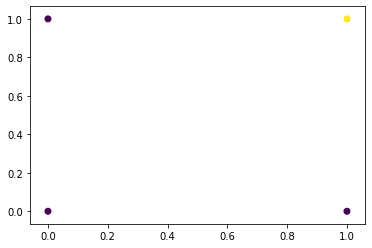

In [3]:
plt.scatter([point[0] for point in data_AND], [point[1] for point in data_AND], c=labels_AND)
plt.show()

In [8]:
data_XOR = [[0,0],[0,1],[1,0],[1,1]]
labels_XOR = [0, 1, 1, 0]

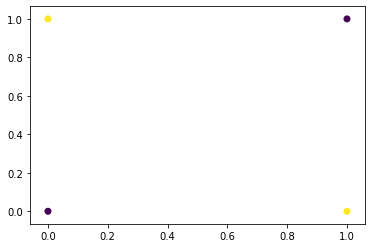

In [9]:
plt.scatter([point[0] for point in data_XOR], [point[1] for point in data_XOR], c=labels_XOR)
plt.show()

In [10]:
data_OR = [[0,0],[0,1],[1,0],[1,1]]
labels_OR = [0, 1, 1, 1]

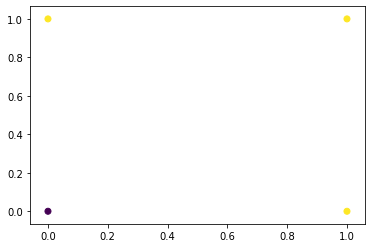

In [12]:
plt.scatter([point[0] for point in data_XOR], [point[1] for point in data_OR], c=labels_OR)
plt.show()

## Building the perceptron

In [35]:
def classifier(data, labels, decision_list):
    classifier = Perceptron(max_iter=40)
    classifier.fit(data, labels)
    score = classifier.score(data, labels)
    decision_function = classifier.decision_function(decision_list)
    print('score: ' + str(score), 'decision_function: ' + str(decision_function))
    return decision_function

In [27]:
classifier(data_AND, labels_AND, [[0, 0], [1, 1], [0.5, 0.5]])

score: 1.0 decision_function: [-2.  2.  0.]


In [28]:
classifier(data_XOR, labels_XOR, [[0, 0], [1, 1], [0.5, 0.5]])

score: 0.5 decision_function: [0. 0. 0.]


In [29]:
classifier(data_OR, labels_OR, [[0, 0], [1, 1], [0.5, 0.5]])

score: 1.0 decision_function: [-1.  3.  1.]


In [30]:
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)

In [31]:
point_grid = list(product(x_values, y_values))

In [36]:
distances_AND = classifier(data_AND, labels_AND, point_grid)

score: 1.0 decision_function: [-2.         -1.97979798 -1.95959596 ...  1.95959596  1.97979798
  2.        ]


In [37]:
distances_XOR = classifier(data_XOR, labels_XOR, point_grid)

score: 0.5 decision_function: [0. 0. 0. ... 0. 0. 0.]


In [38]:
distances_OR = classifier(data_OR, labels_OR, point_grid)

score: 1.0 decision_function: [-1.         -0.97979798 -0.95959596 ...  2.95959596  2.97979798
  3.        ]


In [39]:
abs_distances_AND = [abs(x) for x in distances_AND]

In [40]:
abs_distances_XOR = [abs(x) for x in distances_XOR]

In [41]:
abs_distances_OR = [abs(x) for x in distances_OR]

In [42]:
distances_matrix_AND = np.reshape(abs_distances_AND, (100, 100))

In [43]:
distances_matrix_XOR = np.reshape(abs_distances_XOR, (100, 100))

In [45]:
distances_matrix_OR = np.reshape(abs_distances_OR, (100, 100))

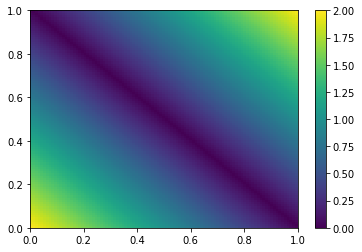

In [47]:
heatmap_AND = plt.pcolormesh(x_values, y_values, distances_matrix_AND)
plt.colorbar(heatmap_AND)
plt.show()

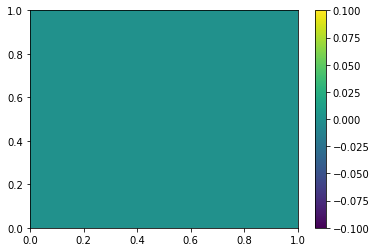

In [48]:
heatmap_XOR = plt.pcolormesh(x_values, y_values, distances_matrix_XOR)
plt.colorbar(heatmap_XOR)
plt.show()

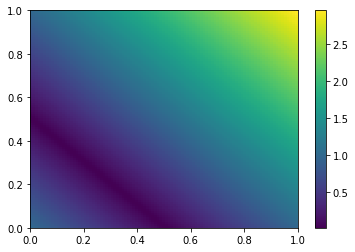

In [49]:
heatmap_OR = plt.pcolormesh(x_values, y_values, distances_matrix_OR)
plt.colorbar(heatmap_OR)
plt.show()